In [1]:
import tensorflow
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)  

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from tensorflow.keras import optimizers


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [14]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - a

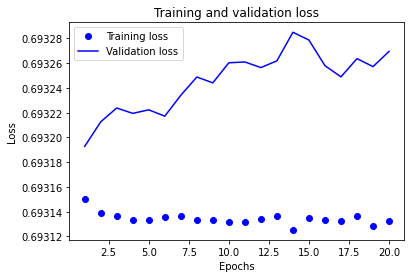

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
